# COMPARATIVE  ANALYSIS  IN OUTLIER  DETECTION IN RAW  WATER  QUALITY  `NYEWASCO` WITH RANDOM FOREST  ALGORITHMS  AND  LOCAL FACTOR  OUTLIER. 
## OBJECTIVES
- Comparare  RCF, LOF AND  IF  algorithms. 

In [14]:
!pip install rrcf==0.4.4 scikit-learn==1.5.1 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  plotly.express as  px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import  seaborn  as  sns
from datetime import datetime
plt.style.use('seaborn-v0_8-bright')

In [2]:
df = pd.read_csv ('Data_Raw_Water.csv')
print("Dataset shape: {}".format(df.shape))
df

Dataset shape: (2658, 3)


,time,turbidity,pH
0,2020-11-04 11:00:31.822439+00:00,21.063435,7.34
1,2020-11-04 11:01:22.124333+00:00,20.868153,7.33
2,2020-11-04 11:01:51.663062+00:00,20.584553,7.32
3,2020-11-04 11:02:29.373718+00:00,21.185328,7.33
4,2020-11-04 11:03:45.517010+00:00,21.063435,7.32
...,...,...,...
2653,2021-01-04 07:53:20.987423+00:00,10.611506,7.35
2654,2021-01-04 08:23:37.035804+00:00,17.975997,7.35
2655,2021-01-04 08:53:53.104009+00:00,17.734662,7.34
2656,2021-01-04 09:24:09.578901+00:00,15.094176,7.36


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2658 entries, 0 to 2657
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   time       2658 non-null   object 
 1   turbidity  2658 non-null   float64
 2   pH         2658 non-null   float64
dtypes: float64(2), object(1)
memory usage: 62.4+ KB


In [4]:
df.describe()

,turbidity,pH
count,2658.000000,2658.000000
mean,23.324646,7.352193
std,27.798332,0.009652
min,8.856159,7.300000
25%,13.975997,7.350000
50%,17.734662,7.350000
75%,18.438760,7.350000
max,311.975997,7.410000


In [5]:
df["time"]  = pd.to_datetime(df["time"])

In [6]:
df.isna().sum() #checking  for  null values. 

time         0
turbidity    0
pH           0
dtype: int64

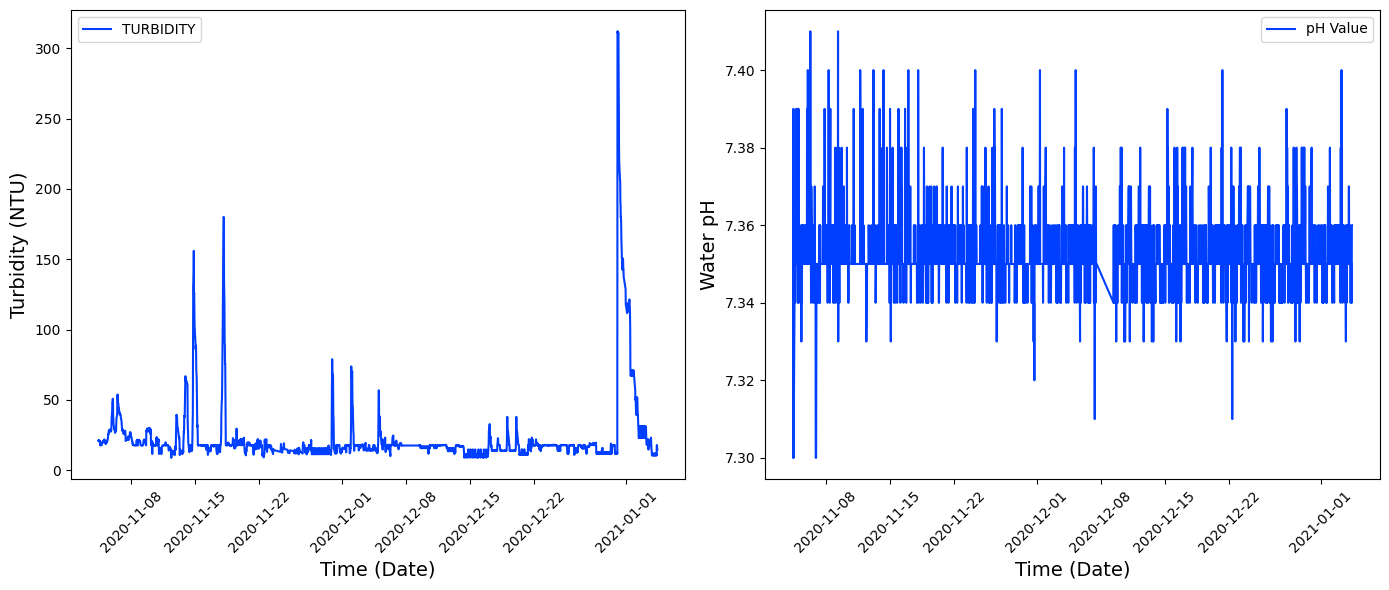

In [7]:
import matplotlib.pyplot as plt

# Set the figure size to be larger
plt.figure(figsize=(14, 6))

# RAW WATER TURBIDITY TREND
plt.subplot(1, 2, 1)
plt.plot(df['time'], df['turbidity'])
plt.legend(['TURBIDITY'])
plt.xticks(rotation=45)
plt.xlabel('Time (Date)', size=14)
plt.ylabel('Turbidity (NTU)', size=14)

# RAW WATER pH TREND
plt.subplot(1, 2, 2)
plt.plot(df['time'], df['pH'])
plt.legend(['pH Value'])
plt.xticks(rotation=45)
plt.xlabel('Time (Date)', size=14)
plt.ylabel('Water pH', size=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.savefig("vaiables_trend.png")
plt.show()

In [8]:
print("Data ranges  from date {} to {}".format(df.time.min(), df.time.max()))

Data ranges  from date 2020-11-04 11:00:31.822439+00:00 to 2021-01-04 09:54:25.214766+00:00


In [9]:
print("Data samples in the  if_model_dfset: {}".format(len(df)))

Data samples in the  if_model_dfset: 2658


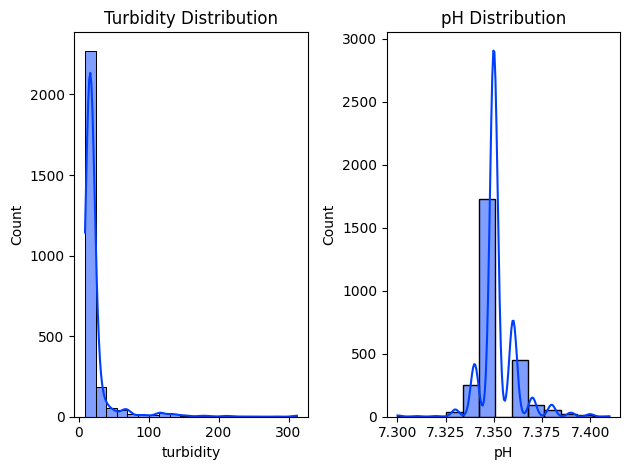

In [10]:
plt.subplot(1,2,1)
sns.histplot(df["turbidity"], bins=20, kde=True)
plt.title("Turbidity Distribution")

plt.subplot(1,2,2)
sns.histplot(df["pH"], kde=True)
plt.title("pH Distribution")

plt.tight_layout()

plt.savefig("variable_distributions.png",)

### Turbidity Distribution:
- **Shape**: The turbidity distribution is highly right-skewed (positively skewed). Most of the data points are concentrated at the lower end of the scale.
- **Concentration**: A significant number of observations have very low turbidity values, close to zero.
- **Outliers**: There are a few observations with much higher turbidity values, extending up to around 300, but these are relatively rare.

### pH Distribution:
- **Shape**: The pH distribution is approximately normal but with a very narrow range.
- **Concentration**: The majority of the pH values are tightly clustered around the mean, which appears to be around 7.35.
- **Spread**: The distribution shows a high peak, indicating that most of the pH values are very close to the mean, with very few values deviating significantly from it.

### Insights:
1. **Turbidity**: The data suggests that most samples have low turbidity, indicating clear water in most cases. However, there are occasional instances of high turbidity, which could be due to specific events or conditions causing temporary increases in water turbidity.
2. **pH**: The pH values are very consistent and centered around a neutral pH of 7.35. This indicates stable water quality in terms of acidity and alkalinity, with very little variation.

# Modelling
## using RRCF, IF, LOF

Here  we  shall be  modelling  all the  variables  using  the  mentioned machine learning  models for  anomaly  detection.


In [11]:
from sklearn.ensemble import IsolationForest
clf = IsolationForest()
clf.get_params()

{'bootstrap': False,
 'contamination': 'auto',
 'max_features': 1.0,
 'max_samples': 'auto',
 'n_estimators': 100,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Isolation forest (Turbidity): {'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Isolation forest (pH): {'bootstrap': False, 'contamination': 0.05, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 50, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False}
Fitting 3 folds for each of 9 candidates, totalling 27 fits


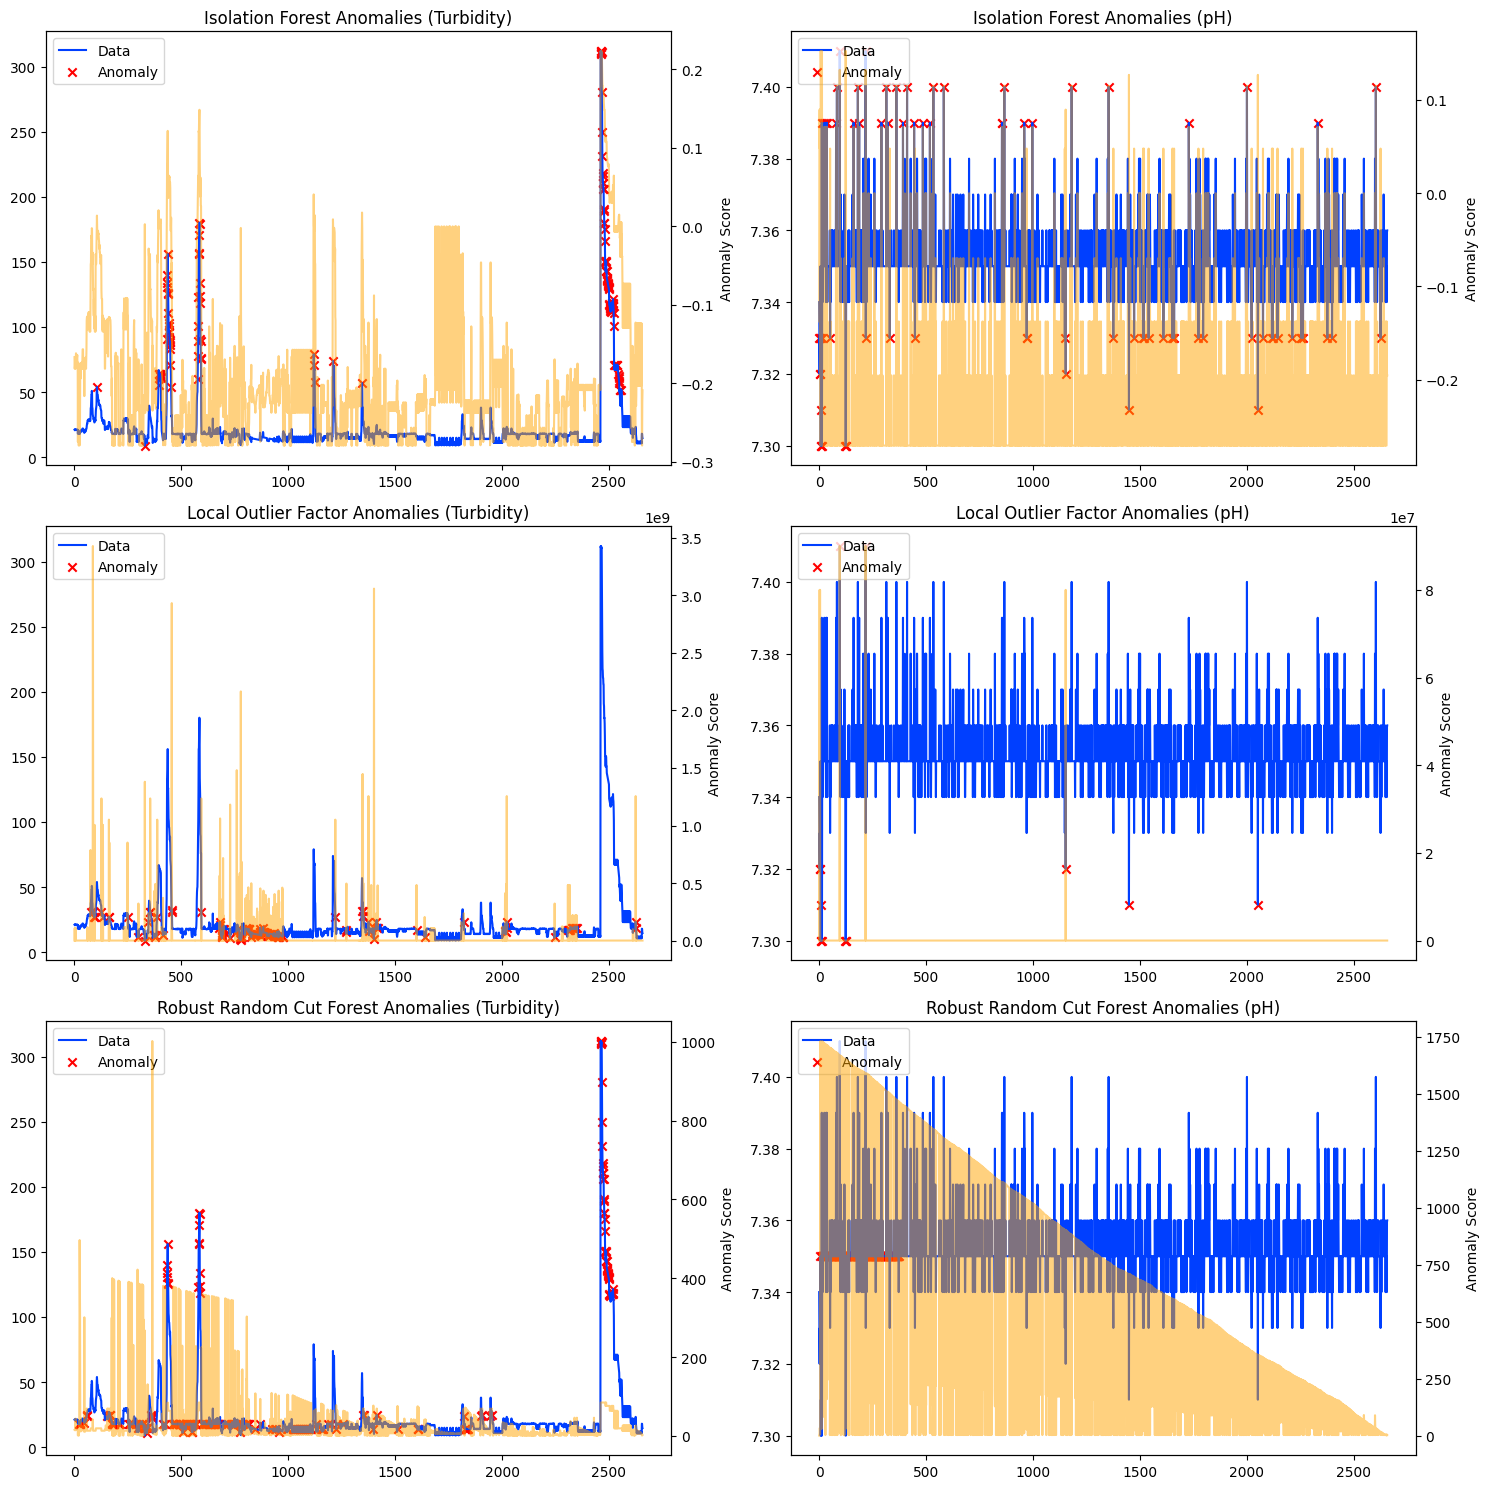

Isolation Forest time (Turbidity): 6.09 seconds
Local Outlier Factor time (Turbidity): 0.31 seconds
Robust Random Cut Forest time (Turbidity): 1.26 seconds
Isolation Forest time (pH): 10.14 seconds
Local Outlier Factor time (pH): 1.42 seconds
Robust Random Cut Forest time (pH): 64.35 seconds


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import GridSearchCV
import rrcf
import warnings
import time
warnings.filterwarnings('ignore')

# Step 1: assigning preprocessed data
data = df

# Step 2: Preprocess the data
# Extract the turbidity and pH columns
turbidity = data[['turbidity']]
pH = data[['pH']]

# Function to plot anomalies
def plot_anomalies(data, anomalies, scores, title, ax):
    ax.plot(data, label='Data')
    ax.scatter(data.index[anomalies], data[anomalies], color='red', marker='x', label='Anomaly')
    ax.set_title(title)
    ax.legend(loc='upper left')
    ax2 = ax.twinx()
    ax2.plot(data.index, scores, color='orange', alpha=0.5)
    ax2.set_ylabel('Anomaly Score')

# Step 3: Hyperparameter tuning and anomaly detection
# Timing Isolation Forest
start_time = time.time()
iso_forest = IsolationForest()
param_grid = {'n_estimators': [50, 100, 200], 'contamination': [0.05, 0.1, 0.15]}
grid_search_iso = GridSearchCV(iso_forest, param_grid, scoring='accuracy', cv=3, verbose=True)
grid_search_iso.fit(turbidity)
iso_time = time.time() - start_time
best_iso_forest = grid_search_iso.best_estimator_
start_time = time.time()  # Start timing after finding the best estimator
iso_anomalies = best_iso_forest.predict(turbidity)
iso_anomalies = np.where(iso_anomalies == -1, True, False)
iso_scores = -best_iso_forest.decision_function(turbidity)
iso_time += time.time() - start_time  # Add time taken for training and prediction
print(f"Isolation forest (Turbidity): {best_iso_forest.get_params()}")

# Timing Local Outlier Factor
start_time = time.time()
lof = LocalOutlierFactor()
param_grid = {'n_neighbors': [10, 20, 30], 'contamination': [0.05, 0.1, 0.15]}
grid_search_lof = GridSearchCV(lof, param_grid, scoring='accuracy', cv=3, verbose=True)
grid_search_lof.fit(turbidity)
lof_time = time.time() - start_time
best_lof = grid_search_lof.best_estimator_
start_time = time.time()  # Start timing after finding the best estimator
lof_anomalies = best_lof.fit_predict(turbidity)
lof_anomalies = np.where(lof_anomalies == -1, True, False)
lof_scores = -best_lof.negative_outlier_factor_
lof_time += time.time() - start_time  # Add time taken for training and prediction

# Timing Robust Random Cut Forest
start_time = time.time()
forest = rrcf.RCTree()
for i, point in enumerate(turbidity.values):
    forest.insert_point(point, index=i)
rrcf_time = time.time() - start_time
rrcf_scores = np.array([forest.codisp(i) for i in range(len(turbidity))])
threshold = np.percentile(rrcf_scores, 90)
rrcf_anomalies = rrcf_scores > threshold

data['iso_anomalies_turbidity'] = iso_anomalies
data['iso_scores_turbidity'] = iso_scores
data['lof_anomalies_turbidity'] = lof_anomalies
data['lof_scores_turbidity'] = lof_scores
data['rrcf_anomalies_turbidity'] = rrcf_anomalies
data['rrcf_scores_turbidity'] = rrcf_scores

# Step 4: Visualize the anomalies
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Plot for Isolation Forest (Turbidity)
plot_anomalies(turbidity, iso_anomalies, iso_scores, 'Isolation Forest Anomalies (Turbidity)', axs[0, 0])

# Plot for Local Outlier Factor (Turbidity)
plot_anomalies(turbidity, lof_anomalies, lof_scores, 'Local Outlier Factor Anomalies (Turbidity)', axs[1, 0])

# Plot for Robust Random Cut Forest (Turbidity)
plot_anomalies(turbidity, rrcf_anomalies, rrcf_scores, 'Robust Random Cut Forest Anomalies (Turbidity)', axs[2, 0])

# Repeat the process for pH

# Timing Isolation Forest (pH)
start_time = time.time()
grid_search_iso.fit(pH)
iso_time_pH = time.time() - start_time
best_iso_forest = grid_search_iso.best_estimator_
start_time = time.time()  # Start timing after finding the best estimator
iso_anomalies = best_iso_forest.predict(pH)
iso_anomalies = np.where(iso_anomalies == -1, True, False)
iso_scores = -best_iso_forest.decision_function(pH)
iso_time_pH += time.time() - start_time  # Add time taken for training and prediction
print(f"Isolation forest (pH): {best_iso_forest.get_params()}")

# Timing Local Outlier Factor (pH)
start_time = time.time()
grid_search_lof.fit(pH)
lof_time_pH = time.time() - start_time
best_lof = grid_search_lof.best_estimator_
start_time = time.time()  # Start timing after finding the best estimator
lof_anomalies = best_lof.fit_predict(pH)
lof_anomalies = np.where(lof_anomalies == -1, True, False)
lof_scores = -best_lof.negative_outlier_factor_
lof_time_pH += time.time() - start_time  # Add time taken for training and prediction

# Timing Robust Random Cut Forest (pH)
start_time = time.time()
forest = rrcf.RCTree()
for i, point in enumerate(pH.values):
    forest.insert_point(point, index=i)
rrcf_time_pH = time.time() - start_time
rrcf_scores = np.array([forest.codisp(i) for i in range(len(pH))])
threshold = np.percentile(rrcf_scores, 90)
rrcf_anomalies = rrcf_scores > threshold

data['iso_anomalies_pH'] = iso_anomalies
data['iso_scores_pH'] = iso_scores
data['lof_anomalies_pH'] = lof_anomalies
data['lof_scores_pH'] = lof_scores
data['rrcf_anomalies_pH'] = rrcf_anomalies
data['rrcf_scores_pH'] = rrcf_scores

# Plot for Isolation Forest (pH)
plot_anomalies(pH, iso_anomalies, iso_scores, 'Isolation Forest Anomalies (pH)', axs[0, 1])

# Plot for Local Outlier Factor (pH)
plot_anomalies(pH, lof_anomalies, lof_scores, 'Local Outlier Factor Anomalies (pH)', axs[1, 1])

# Plot for Robust Random Cut Forest (pH)
plot_anomalies(pH, rrcf_anomalies, rrcf_scores, 'Robust Random Cut Forest Anomalies (pH)', axs[2, 1])

plt.tight_layout()
plt.show()

# Save the data with anomaly scores
data.to_csv("data_aw_water_anomalies_anomaly_scores.csv")

# Print the timing results
print(f"Isolation Forest time (Turbidity): {iso_time:.2f} seconds")
print(f"Local Outlier Factor time (Turbidity): {lof_time:.2f} seconds")
print(f"Robust Random Cut Forest time (Turbidity): {rrcf_time:.2f} seconds")
print(f"Isolation Forest time (pH): {iso_time_pH:.2f} seconds")
print(f"Local Outlier Factor time (pH): {lof_time_pH:.2f} seconds")
print(f"Robust Random Cut Forest time (pH): {rrcf_time_pH:.2f} seconds")

In [13]:
data.to_csv("data_aw_water_anomalies_amomaly_scores.csv")
data

,time,turbidity,pH,iso_anomalies_turbidity,iso_scores_turbidity,lof_anomalies_turbidity,lof_scores_turbidity,rrcf_anomalies_turbidity,rrcf_scores_turbidity,iso_anomalies_pH,iso_scores_pH,lof_anomalies_pH,lof_scores_pH,rrcf_anomalies_pH,rrcf_scores_pH
0,2020-11-04 11:00:31.822439+00:00,21.063435,7.34,False,-0.166538,False,1.732049e+00,False,15.426230,False,-0.137560,False,1.000000e+00,False,1.000000
1,2020-11-04 11:01:22.124333+00:00,20.868153,7.33,False,-0.181264,False,1.079480e+08,False,14.683333,True,0.047850,False,1.000000e+00,False,5.911263
2,2020-11-04 11:01:51.663062+00:00,20.584553,7.32,False,-0.177541,False,1.011609e+00,False,14.683333,True,0.089690,True,8.000000e+07,False,6.888889
3,2020-11-04 11:02:29.373718+00:00,21.185328,7.33,False,-0.166639,False,1.053255e+00,False,15.426230,True,0.047850,False,1.000000e+00,False,35.000000
4,2020-11-04 11:03:45.517010+00:00,21.063435,7.32,False,-0.166538,False,1.732049e+00,False,14.683333,True,0.089690,True,8.000000e+07,False,6.888889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2653,2021-01-04 07:53:20.987423+00:00,10.611506,7.35,False,-0.123626,False,1.000000e+00,False,5.685950,False,-0.270668,False,1.000000e+00,False,2.000000
2654,2021-01-04 08:23:37.035804+00:00,17.975997,7.35,False,-0.274574,False,1.000000e+00,False,1.318421,False,-0.270668,False,1.000000e+00,False,1.000000
2655,2021-01-04 08:53:53.104009+00:00,17.734662,7.34,False,-0.279141,False,1.000000e+00,False,0.977011,False,-0.137560,False,1.000000e+00,False,5.911263
2656,2021-01-04 09:24:09.578901+00:00,15.094176,7.36,False,-0.223745,False,1.000000e+00,False,2.053398,False,-0.195354,False,1.000000e+00,False,3.199052


# Models  evaluation on (turbidity)

In [15]:
turb_anomalies = true_anomalies  = pd.read_csv("turbidity_anomalies.csv")
turb_anomalies["turbidity"]  = turb_anomalies["turbidity_anomaly"]
turb_anomalies = turb_anomalies.drop("turbidity_anomaly", axis =1)

In [16]:
import pandas as pd

# Load the anomaly scores from the trained models
anomaly_scores = pd.read_csv('data_aw_water_anomalies_amomaly_scores.csv')

# Load the ground truth data
turbidity_true_anomalies = pd.read_csv('turbidity_true_anomalies_2.csv')
ph_true_anomalies = pd.read_csv('ph_true_anomalies_2.csv')

In [17]:
turb_eval = anomaly_scores.merge(turbidity_true_anomalies, how="inner", on="turbidity")
turb_eval

,Unnamed: 0,time_x,turbidity,pH,iso_anomalies_turbidity,iso_scores_turbidity,lof_anomalies_turbidity,lof_scores_turbidity,rrcf_anomalies_turbidity,rrcf_scores_turbidity,iso_anomalies_pH,iso_scores_pH,lof_anomalies_pH,lof_scores_pH,rrcf_anomalies_pH,rrcf_scores_pH,time_y
0,81,2020-11-06 00:05:15.172488+00:00,50.856159,7.35,False,-0.012438,False,1.005945,False,26.304348,False,-0.263685,False,1.0,True,1681.000000,2020-11-06 00:05:15.172488+00:00
1,81,2020-11-06 00:05:15.172488+00:00,50.856159,7.35,False,-0.012438,False,1.005945,False,26.304348,False,-0.263685,False,1.0,True,1681.000000,2020-11-06 12:11:40.267604+00:00
2,81,2020-11-06 00:05:15.172488+00:00,50.856159,7.35,False,-0.012438,False,1.005945,False,26.304348,False,-0.263685,False,1.0,True,1681.000000,2020-12-02 03:29:58.649298+00:00
3,82,2020-11-06 00:35:31.220269+00:00,49.734662,7.35,False,-0.015770,False,0.953425,False,26.304348,False,-0.263685,False,1.0,True,1680.000000,2020-11-06 00:35:31.220269+00:00
4,104,2020-11-06 12:11:40.267604+00:00,50.856159,7.35,False,-0.012438,False,1.005945,False,26.304348,False,-0.263685,False,1.0,True,1664.000000,2020-11-06 00:05:15.172488+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2554,2021-01-02 02:55:08.469556+00:00,51.856159,7.36,False,-0.007531,False,1.130842,False,26.304348,False,-0.192363,False,1.0,False,3.183824,2021-01-02 02:55:08.469556+00:00
212,2554,2021-01-02 02:55:08.469556+00:00,51.856159,7.36,False,-0.007531,False,1.130842,False,26.304348,False,-0.192363,False,1.0,False,3.183824,2021-01-02 04:56:12.732646+00:00
213,2558,2021-01-02 04:56:12.732646+00:00,51.856159,7.35,False,-0.007531,False,1.130842,False,26.304348,False,-0.263685,False,1.0,False,62.000000,2021-01-02 00:54:04.232075+00:00
214,2558,2021-01-02 04:56:12.732646+00:00,51.856159,7.35,False,-0.007531,False,1.130842,False,26.304348,False,-0.263685,False,1.0,False,62.000000,2021-01-02 02:55:08.469556+00:00


In [18]:
ph_eval = anomaly_scores.merge(ph_true_anomalies, how="inner", on="pH")
ph_eval

,Unnamed: 0,time_x,turbidity,pH,iso_anomalies_turbidity,iso_scores_turbidity,lof_anomalies_turbidity,lof_scores_turbidity,rrcf_anomalies_turbidity,rrcf_scores_turbidity,iso_anomalies_pH,iso_scores_pH,lof_anomalies_pH,lof_scores_pH,rrcf_anomalies_pH,rrcf_scores_pH,time_y
0,1,2020-11-04 11:01:22.124333+00:00,20.868153,7.33,False,-0.205637,False,1.079480e+08,False,8.500000,True,0.043989,False,1.0,False,8.099644,2020-11-04 11:01:22.124333+00:00
1,1,2020-11-04 11:01:22.124333+00:00,20.868153,7.33,False,-0.205637,False,1.079480e+08,False,8.500000,True,0.043989,False,1.0,False,8.099644,2020-11-04 11:02:29.373718+00:00
2,1,2020-11-04 11:01:22.124333+00:00,20.868153,7.33,False,-0.205637,False,1.079480e+08,False,8.500000,True,0.043989,False,1.0,False,8.099644,2020-11-04 11:05:01.621475+00:00
3,1,2020-11-04 11:01:22.124333+00:00,20.868153,7.33,False,-0.205637,False,1.079480e+08,False,8.500000,True,0.043989,False,1.0,False,8.099644,2020-11-04 11:21:25.498204+00:00
4,1,2020-11-04 11:01:22.124333+00:00,20.868153,7.33,False,-0.205637,False,1.079480e+08,False,8.500000,True,0.043989,False,1.0,False,8.099644,2020-11-05 08:12:48.104690+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1714,2626,2021-01-03 17:45:51.270365+00:00,18.325558,7.33,False,-0.248070,True,2.194725e+08,False,18.857143,True,0.043989,False,1.0,False,8.099644,2020-12-26 14:03:51.090294+00:00
1715,2626,2021-01-03 17:45:51.270365+00:00,18.325558,7.33,False,-0.248070,True,2.194725e+08,False,18.857143,True,0.043989,False,1.0,False,8.099644,2020-12-26 17:35:43.531456+00:00
1716,2626,2021-01-03 17:45:51.270365+00:00,18.325558,7.33,False,-0.248070,True,2.194725e+08,False,18.857143,True,0.043989,False,1.0,False,8.099644,2020-12-29 05:37:06.277708+00:00
1717,2626,2021-01-03 17:45:51.270365+00:00,18.325558,7.33,False,-0.248070,True,2.194725e+08,False,18.857143,True,0.043989,False,1.0,False,8.099644,2020-12-29 16:42:59.647885+00:00


In [19]:
turb_eval.columns

Index(['Unnamed: 0', 'time_x', 'turbidity', 'pH', 'iso_anomalies_turbidity',
       'iso_scores_turbidity', 'lof_anomalies_turbidity',
       'lof_scores_turbidity', 'rrcf_anomalies_turbidity',
       'rrcf_scores_turbidity', 'iso_anomalies_pH', 'iso_scores_pH',
       'lof_anomalies_pH', 'lof_scores_pH', 'rrcf_anomalies_pH',
       'rrcf_scores_pH', 'time_y'],
      dtype='object')

In [20]:
import pandas as pd

# Example dictionary containing anomaly counts
turbidity_ml_performance = {
    "Turbidity_isolation_forest": [len([i for i in turb_eval['iso_anomalies_turbidity'] if i == True])],
    "Turbidity_local_factor_outlier": [len([i for i in turb_eval['lof_anomalies_turbidity'] if i == True])],
    "Turbidity_rrcf": [len([i for i in turb_eval['rrcf_anomalies_turbidity'] if i == True])]
}

# Create the DataFrame
turb_model_detection = pd.DataFrame(turbidity_ml_performance).T

# Rename the first column
turb_model_detection.columns = ["sum of anomalies detected"]

# Add a new column for anomalies not detected
total_anomalies = 216
turb_model_detection['anomalies not detected'] = total_anomalies - turb_model_detection['sum of anomalies detected']

# Display the DataFrame
turb_model_detection

,sum of anomalies detected,anomalies not detected
Turbidity_isolation_forest,182,34
Turbidity_local_factor_outlier,0,216
Turbidity_rrcf,19,197


In [22]:
ph_ml_performance = {"pH_isolation_forest":[len([i for i in ph_eval['iso_anomalies_pH'] if  i==True])],
               "pH_local_factor_outlier":[len([i for i in ph_eval['lof_anomalies_pH'] if  i==True])],
               "pH_rrcf":[len([i for i in ph_eval['rrcf_anomalies_pH'] if  i==True])]}
ph_model_detection = pd.DataFrame(ph_ml_performance).T
# Rename the first column
ph_model_detection.columns = ["sum of anomalies detected"]

# Add a new column for anomalies not detected
total_anomalies = 1819
ph_model_detection['anomalies not detected'] = total_anomalies - ph_model_detection['sum of anomalies detected']
ph_model_detection

,sum of anomalies detected,anomalies not detected
pH_isolation_forest,1719,100
pH_local_factor_outlier,58,1761
pH_rrcf,0,1819


In [1]:
1819 - 8

1811